總之先 import 需要的函式庫

In [0]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

接著把我們需要的資料集下載下來

為了拿到全部資訊，先不要讓它只回傳 x 跟 y

In [0]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(return_X_y=False)

看一下資料集的描述

In [0]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

嗯，看起來有十個特徵跟 442 筆資料呢

把資料的名字跟 shape 印出來確認一下

In [0]:
print("feature names: diabetes.feature_names")
print("data shape: ", diabetes.data.shape)
print("target shape: ", diabetes.target.shape)

feature names: diabetes.feature_names
data shape:  (442, 10)
target shape:  (442,)


跟之前一樣，把「給模型當作參考的特徵」當成 X， 「要模型去學的答案」叫做 Y

In [0]:
X = diabetes.data
Y = diabetes.target

為了怕模型 overfit，我們需要把資料分成訓練資料跟測試資料

還要養成沒事查看 shape 以防手滑的好習慣

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=33)
print("x_train:", x_train.shape, " x_test:", x_test.shape, " y_train:", y_train.shape, " y_test:", y_test.shape, )

x_train: (353, 10)  x_test: (89, 10)  y_train: (353,)  y_test: (89,)


因為已經很熟了，所以「叫出函數學習機」，「訓練函數學習機」，「把函數學習機拿來用」
可以一氣呵成！


In [0]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_predict = regr.predict(x_test)

為了看看模型是不是學的好棒棒，把「真實的結果」當作 x 座標，
「預測的結果」當作 y 座標描點在圖上

為了方便比較，再畫一條對角線當作比較基準！

(學得好的話，所有的點應該都會在對角線上，表示結果一樣)


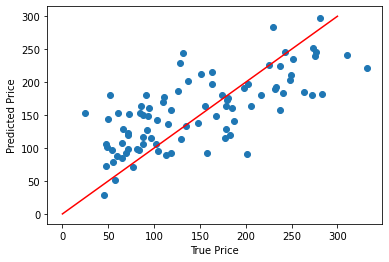

In [0]:
plt.scatter(y_test, y_predict)
plt.plot([0, 300], [0, 300], 'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

plt.show()

嗯嗯，看起來效果不是很好，理由可能是:

1. 給的特徵不足以預測乳癌: 

  裏面的資料除了人的年齡和性別之外，還有血壓和血清的資料，

  可能真的不太夠(比如要看看 x 光片之類的)

2. 模型的參數或是模型不夠好:

  其實線性迴歸也有很多可以調的參數，但我們這裏全部都用預設的，

  之後可以多調整看看！

  description 裏面的「更多資訊」有提到一篇論文，點進去看會發現是一種超級複雜的迴歸模型，

  這個資料可能真的需要複雜一點的模型才會把函數學得好。